## Exploratory Data Analysis: Fire Incidents

This Jupyter Notebook details exploratory data analysis conducted upon the fire incididents dataset.

## Setup

Datasets that will be investigated have undergone some pre-processing. 

_Note: As of 8/2/2017, datasets that are used contain data entry errors. Consider fixing, and then rerunning code on cleaned-up data._

In [87]:
## Import relevant libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

## Boilerplate Python 2.7 code (floor division sucks)

from __future__ import division

In [2]:
## Import relevant datasets
## These are from raw_with_match folder

taxmap_data = pd.read_csv('data/tax_map.csv')

taxrolls_data = pd.read_csv('data/Historic_Secured_Property_Tax_Rolls.csv')

fire_incidents_data = pd.read_csv('data/matched_Fire_Incidents.csv')

/home/seward/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/seward/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## Show columns for tax map data

taxmap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271880 entries, 0 to 271879
Data columns (total 4 columns):
Tax_ID                271880 non-null object
EAS BaseID Matched    271880 non-null int64
EAS_Address_Found     271880 non-null object
Tax_ID_Location       271880 non-null object
dtypes: int64(1), object(3)
memory usage: 8.3+ MB


In [4]:
## Show columns for tax rolls data

taxrolls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817896 entries, 0 to 1817895
Data columns (total 42 columns):
Closed Roll Fiscal Year                       float64
Property Location                             object
Neighborhood Code                             object
Neighborhood Code Definition                  object
Block and Lot Number                          object
Volume Number                                 int64
Property Class Code                           object
Property Class Code Definition                object
Year Property Built                           float64
Number of Bathrooms                           float64
Number of Bedrooms                            int64
Number of Rooms                               int64
Number of Stories                             int64
Number of Units                               int64
Characteristics Change Date                   float64
Zoning Code                                   object
Construction Type                       

In [5]:
## Show columns for fire incidents data

fire_incidents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52824 entries, 0 to 52823
Data columns (total 71 columns):
Unnamed: 0                                      52824 non-null int64
Incident Number                                 52824 non-null int64
Exposure Number                                 52824 non-null int64
Address                                         52803 non-null object
Incident Date                                   52824 non-null object
Call Number                                     52824 non-null int64
Alarm DtTm                                      52824 non-null object
Arrival DtTm                                    52824 non-null object
Close DtTm                                      52824 non-null object
City                                            52710 non-null object
Zipcode                                         42786 non-null float64
Battalion                                       52824 non-null object
Station Area                                    52739 

## Data Transformation

The two imported tax datasets contain information about buildings, and the fire incidents dataset contains details about individual fire incidents. Joining the three will result in one dataset that contains information about fire incidents, and building information associated with each incident.

We will...
* Join tax data with fire incidents data
* Use tax data from FY 2015
* Use fire incidents data from 2011 through 2015

Tax data and fire incidents data are joined on EAS code.

The output of this section, the dataframe `joined_incident`, will be the master dataframe that we will work off of for the rest of exploratory data analysis.

In [6]:
## Inner-join the two tax datasets

temp_tax = pd.merge(taxrolls_data, taxmap_data, how = 'inner', left_on = 'Block and Lot Number',
                    right_on = 'Tax_ID')

## Filter tax data using FY = 2015

temp_tax_2015 = temp_tax[temp_tax['Closed Roll Fiscal Year'] == 2015]

## Keep incident data between 2011 and 2015

temp_incident = fire_incidents_data[(fire_incidents_data['Incident Date'] >= '2011-01-01') 
                                    & (fire_incidents_data['Incident Date'] <= '2015-12-31')]

## Join tax and incident datasets

joined_incident = pd.merge(temp_tax_2015, temp_incident, how = 'left', left_on = 'EAS BaseID Matched',
                           right_on = 'EAS')

In [7]:
## Joined dataset containing tax and incident data

joined_incident.head()

,Closed Roll Fiscal Year,Property Location,Neighborhood Code,Neighborhood Code Definition,Block and Lot Number,Volume Number,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,...,Supervisor District_y,Neighborhood District,Location_y,Longitude,Latitude,LonRad,LatRad,EAS,Closest Address,Score
0,2015.0,0000 0188 MINNA ST0024C,09B,NaN,3722273,25,Z,Z,2005.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,0000 1006 COLE ST0000,05E,Parnassus/Ashbury Heights,1278032,9,Z,Z,1907.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015.0,0000 1650 WEBSTER ST0000,06C,Lower Pacific Heights,0685050,5,PL,PL,1900.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015.0,0000 0601 VAN NESS AV0044,08F,Van Ness/ Civic Center,0762044,6,Z,Z,1982.0,3.0,...,5.0,Western Addition,"(37.7813860000297, -122.421406)",-122.421406,37.781386,-2.136657,0.65941,288216.0,601 VAN NESS AVE,91.0
4,2015.0,0000 0601 VAN NESS AV0044,08F,Van Ness/ Civic Center,0762044,6,Z,Z,1982.0,3.0,...,5.0,Western Addition,"(37.7813860000297, -122.421406)",-122.421406,37.781386,-2.136657,0.65941,288216.0,601 VAN NESS AVE,91.0


## Investigate Fire Incidents vs Building Age

**Hypothesis:** The older the building, the more likely it will catch on fire.

In [8]:
## Calculate count of incidents, grouped by Block and Lot Number and Year Built

collapsed_incident = joined_incident.groupby(['Block and Lot Number', 'Year Property Built'])

collapsed_incident = collapsed_incident['Incident Number'].count()

collapsed_incident = pd.DataFrame(collapsed_incident).reset_index()

collapsed_incident['age'] = 2017 - collapsed_incident['Year Property Built']

In [29]:
collapsed_incident.head()

,Block and Lot Number,Year Property Built,Incident Number,age
0,0005001,1900.0,1,117.0
1,0010001,1907.0,0,110.0
2,0010002,1907.0,1,110.0
3,0011008,1974.0,0,43.0
4,0012001,1953.0,0,64.0


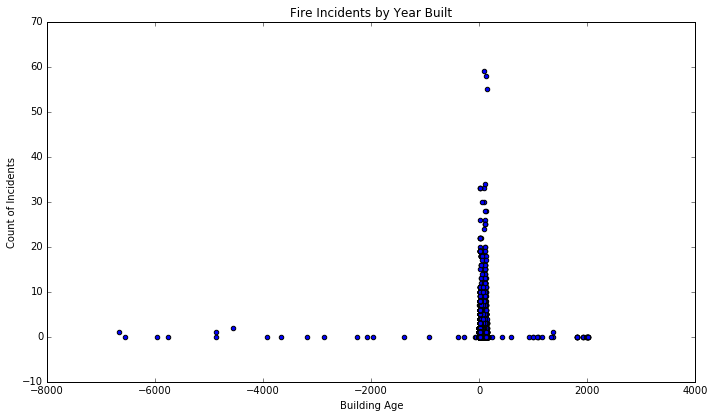

In [48]:
## Graph Fire Incidents by Year Built

fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.25])

x = collapsed_incident['age']
y = collapsed_incident['Incident Number']

axes.scatter(x, y)

axes.set_title('Fire Incidents by Year Built')
axes.set_xlabel('Building Age')
axes.set_ylabel('Count of Incidents')

#axes.set_xlim([0,])
#axes.set_ylim([0, 65])

This plot makes no sense. Something in the data looks off.

In [31]:
## What are the outliers?

collapsed_incident[(collapsed_incident['age'] < 0) | (collapsed_incident['age'] > 200)]

,Block and Lot Number,Year Property Built,Incident Number,age
483,0041102,660.0,0,1357.0
857,0051090,95.0,0,1922.0
859,0051092,95.0,0,1922.0
861,0051094,95.0,0,1922.0
2354,0078098,1594.0,0,423.0
3686,0113016,692.0,0,1325.0
4110,0121050,13.0,0,2004.0
9997,0277025,6889.0,0,-4872.0
11361,0325031,6573.0,2,-4556.0
11368,0326020,8687.0,1,-6670.0


**As of 8/2/2017**, there appears to be a lot of errors in the data. The `Year Property Built` column contains values that make no sense -- you can't have an existing building in San Francisco built in the distant future, or during the days of the Roman Empire.

These are very likely due to data entry errors. 

Let's see how the data looks once we filter out observations likely subject to data entry error...

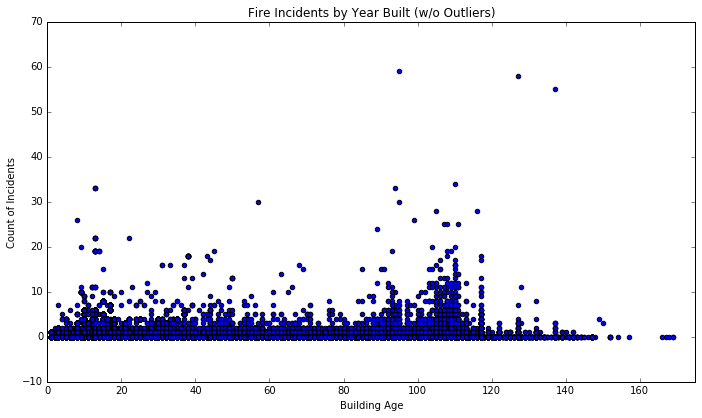

In [47]:
## Plot again after removing data entry errors

fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.25])

collapsed_incident2 = collapsed_incident[(collapsed_incident['age'] > 0) & (collapsed_incident['age'] < 200)]

x = collapsed_incident2['age']
y = collapsed_incident2['Incident Number']

axes.scatter(x, y)

axes.set_title('Fire Incidents by Year Built (w/o Outliers)')
axes.set_xlabel('Building Age')
axes.set_ylabel('Count of Incidents')

axes.set_xlim([0, 175])

axes.set_alpha(0.1)

The scatter plot of fire incidents by building age looks vaguely bimodal. (This is more obvious when you adjust opacity of points in scatter plot.)  

Also, there are some buildings that seem to always catch on fire... 

In [51]:
## Plotted data (with aggregations)

collapsed_incident2[collapsed_incident2['Incident Number'] > 50]

,Block and Lot Number,Year Property Built,Incident Number,age
24381,0753052,1880.0,55,137.0
25067,0775042,1890.0,58,127.0
85797,2647035,1922.0,59,95.0


In [68]:
## Data pre-aggregations

problematic_buildings = joined_incident[
    joined_incident['Block and Lot Number'].apply(lambda x: x in ['0753052', '0775042', '2647035'])]

problematic_buildings['Property Location'].unique()

array(['1398 0000 MCALLISTER          ST0000',
       '0410 0400 CASTRO              ST0000',
       '1663 0000 TURK                ST0000'], dtype=object)

There's something fishy about buildings in McAllister, Castro, and Turk Streets.

Let's look at number of fire incidents for each of these buildings.

In [76]:
problematic_buildings.groupby('Property Location').count()['Closed Roll Fiscal Year']

Property Location
0410 0400 CASTRO              ST0000    70
1398 0000 MCALLISTER          ST0000    65
1663 0000 TURK                ST0000    98
Name: Closed Roll Fiscal Year, dtype: int64

## Investigate Buildings that Caught on Fire vs Building Age

Let's take a look at the proportion of buildings in each age group that caught on fire.

In [79]:
## Create an array with EAS codes for buildings that have had a fire

EAS_buildings = temp_incident['EAS'].unique()

print EAS_buildings

print type(EAS_buildings)

[ 451005.  421616.  421612. ...,  290878.  359058.  403089.]
<type 'numpy.ndarray'>


In [82]:
## df with column showing whether building has had one or more fire incidents

buildings_w_fire = temp_tax_2015

buildings_w_fire['fire'] = buildings_w_fire['EAS BaseID Matched'].apply(lambda x: x in EAS_buildings)

/home/seward/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
## Add column for Age

buildings_w_fire['age'] = 2017 - buildings_w_fire['Year Property Built']

## Add column for Decade

def round_down(num, divisor):
    """Floor division to nearest multiple"""
    return num - num%divisor

buildings_w_fire['decade'] = buildings_w_fire['Year Property Built'].apply(lambda x: round_down(x, 10))

/home/seward/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/seward/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [142]:
## Aggregate

## Sum up buildings with one or more fire, by decade
with_fires = buildings_w_fire.groupby('decade')['fire'].sum()
with_fires = pd.DataFrame(with_fires).reset_index()
with_fires = with_fires.rename(columns = {'fire': 'buildings with fire'})

## Count total buildings, by decade
total_buildings = buildings_w_fire.groupby('decade')['fire'].count()
total_buildings = pd.DataFrame(total_buildings).reset_index()
total_buildings = total_buildings.rename(columns = {'fire': 'total buildings'})

## Join the two columns into dataframe
building_fire_ratio = pd.merge(with_fires, total_buildings, how = 'inner')

## Calculate proportion of buildings with one or more fire
building_fire_ratio['proportion with fire'] = building_fire_ratio['buildings with fire'] / building_fire_ratio['total buildings']

In [147]:
## Print table of ratios 1870s to 2010s
building_fire_ratio[(building_fire_ratio['decade'] >= 1870) & (building_fire_ratio['decade'] <= 2010)]

,decade,buildings with fire,total buildings,proportion with fire
22,1870.0,6.0,187,0.032086
23,1880.0,42.0,964,0.043568
24,1890.0,74.0,2073,0.035697
25,1900.0,2346.0,60488,0.038785
26,1910.0,1703.0,26246,0.064886
27,1920.0,1636.0,39750,0.041157
28,1930.0,313.0,15343,0.020400
29,1940.0,473.0,25972,0.018212
30,1950.0,425.0,13765,0.030875
31,1960.0,1561.0,10312,0.151377


Proportion of buildings with one or more fires spike up beginning 1960. Why? What makes buildings 1960-onward different?

Did they increase construction of multi-unit housing then?